In [12]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [13]:
base_dir = os.path.split(os.getcwd())[0]
base_dir

'c:\\Users\\WHNP83\\OneDrive\\Documents\\GitHub\\MAJOR_PROJECT'

In [24]:
Ravdess = os.path.join(base_dir, 'ravdess')
print(Ravdess)

Crema = os.path.join(base_dir, 'crema', 'AudioWAV')
print(Crema)
crema_emotions = {
    'NEU': 'neutral',
    'HAP': 'happy',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fear',
    'DIS': 'disgust'
}

Surrey = os.path.join(base_dir, 'surrey', 'ALL')
print(Surrey)
savee_emotions = {
    'n': 'neutral',
    'h': 'happy',
    's': 'sad',
    'a': 'angry',
    'f': 'fear',
    'd': 'disgust'
}

Tess = os.path.join(base_dir, 'tess', 'TESS Toronto emotional speech set data')
print(Tess)


c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\ravdess
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\surrey\ALL
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\tess\TESS Toronto emotional speech set data


In [15]:
# CREMA

crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    emotion = file.split('_')[2]
    if emotion in crema_emotions:
        file_emotion.append(crema_emotions[emotion])
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1,disgust,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2,fear,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3,happy,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4,neutral,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...


In [58]:
def get_audio(df, num):
    path = df['Path'][num]
    print(path)
    audio = Audio(path)
    display(audio)

get_audio(Crema_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_ANG_XX.wav


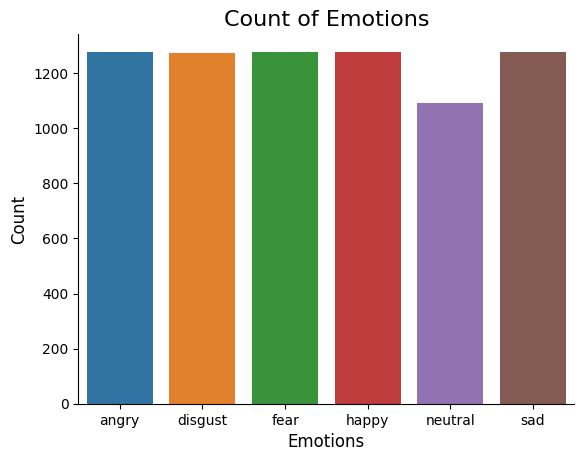

In [52]:
def print_emotion_count(df):
    plt.title('Count of Emotions', size=16)
    sns.countplot(x = df["Emotions"])
    plt.ylabel('Count', size = 12)
    plt.xlabel('Emotions', size = 12)
    sns.despine(top = True, right = True, left = False, bottom = False)
    plt.show()

print_emotion_count(Crema_df)

Text(126.09722222222221, 0.5, 'Amplitude')

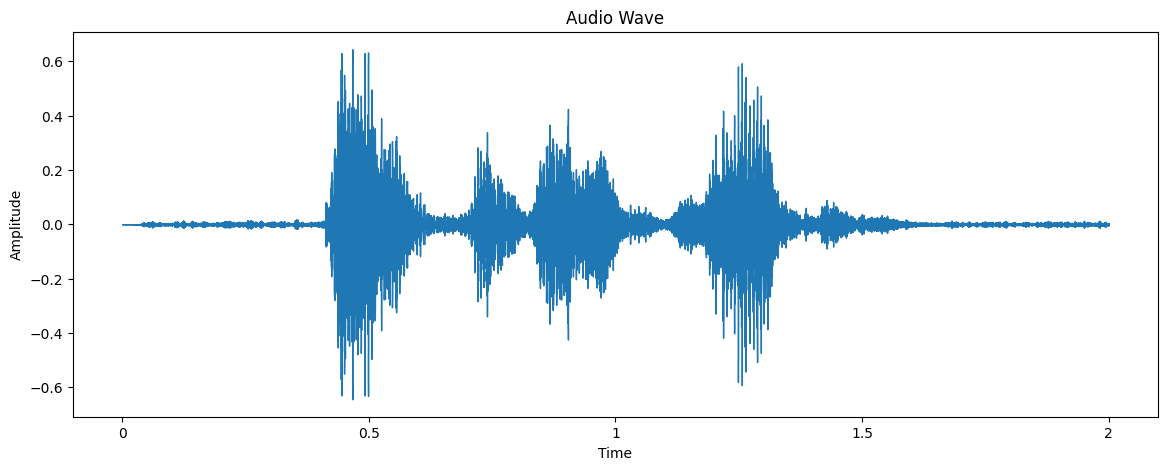

In [16]:
audio_array, sampling_rate = librosa.load(Crema_df['Path'][0], duration = 2)
plt.figure(figsize = (14, 5))
librosa.display.waveshow(audio_array, sr = sampling_rate)
plt.title('Audio Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

https://blog.dataiku.com/speech-emotion-recognition-deep-learning#:~:text=We%20are%20going%20to%20explore%20a%20speech%20emotion,Let%E2%80%99s%20start%20by%20uploading%20the%20dataset%20in%20Dataiku.

https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio

https://devopedia.org/audio-feature-extraction

https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition

In [53]:
# TESS

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        elif part == 'happy(1)':
            file_emotion.append('happy')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...


In [59]:
get_audio(Tess_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\tess\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


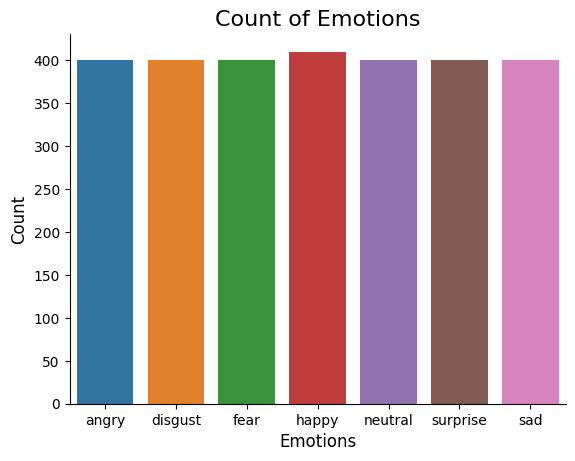

In [54]:
print_emotion_count(Tess_df)

In [48]:
data_path = pd.concat([Crema_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv", index = False)
data_path.head()

,Emotions,Path
0,angry,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1,disgust,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2,fear,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3,happy,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4,neutral,c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...


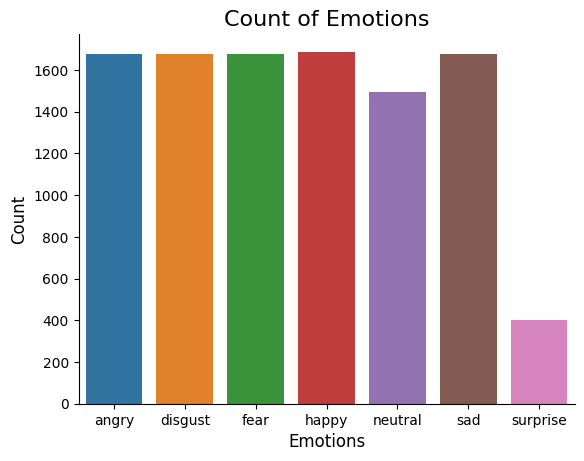

In [49]:
print_emotion_count(data_path)